In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
import re
from unidecode import unidecode

nltk.download('stopwords')
from nltk.corpus import stopwords

from wordcloud import WordCloud


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to /home/oem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def trata_texto(texto):
    """
    Função para tratar um texto em português. Realiza as seguintes operações:
    1. Remove acentos.
    2. Converte o texto para minúsculas.
    3. Remove apóstrofos e substitui hífens por espaços.
    4. Substitui espaços duplos por um único espaço.
    5. Remove as palavras de parada (stopwords) do português.

    Parâmetros:
    texto (str): O texto a ser tratado.

    Retorna:
    str: O texto tratado.

    """
    sem_acentos = unidecode(texto).lower().replace("'", "").replace("-", " ").strip() if pd.notnull(texto) else texto
    sem_espacos_duplos = re.sub(r'\s+', ' ', sem_acentos).strip()
    sw = stopwords.words('portuguese')
    texto_processado = ' '.join([palavra for palavra in sem_espacos_duplos.split(" ") if palavra not in sw])
    return texto_processado if texto_processado else None
    return texto_processado

In [3]:
df_empreend = pd.read_csv('../dados/tratados/simu_carteira_empreendimentos_nulos_tratados.csv')
df_empreend

/tmp/ipykernel_9868/1899346260.py:1: DtypeWarning: Columns (9,42,61,78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df_empreend = pd.read_csv('../dados/tratados/simu_carteira_empreendimentos_nulos_tratados.csv')


,cod_mdr,cod_operacao,cod_saci,cod_convenio_siafi,cod_ag_operador,origem,dsc_concedente,dsc_fonte,dsc_unidade,cod_proposta,...,mun_AMAZONIA,mun_FRONTEIRA,mun_CAPITAL,uf_CODIGO_UF,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_NOME_UF
0,1-38001,319910.0,38001.0,0.0,375658.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,N,N,S,26.0,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO
1,1-38002,319912.0,38002.0,0.0,375664.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,N,N,S,26.0,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO
2,1-38003,319914.0,38003.0,0.0,375666.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,N,N,S,26.0,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO
3,1-38004,354485.0,38004.0,0.0,NaN,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1-38005,345051.0,38005.0,0.0,377438.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,N,N,N,35.0,-21.209,-50.433,390.0,1167311.0,350280.0,SAO PAULO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71243,4-603771,603795.0,0.0,0.0,603771.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,N,N,S,29.0,-12.971,-38.511,8.0,706799.0,292740.0,BAHIA
71244,4-603772,603796.0,0.0,0.0,603772.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,N,N,S,29.0,-12.971,-38.511,8.0,706799.0,292740.0,BAHIA
71245,4-603787,603794.0,0.0,0.0,603787.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,N,N,S,29.0,-12.971,-38.511,8.0,706799.0,292740.0,BAHIA
71246,4-603797,603798.0,0.0,0.0,603797.0,NPAC_FGTS,MINISTERIO DAS CIDADES,FIN,SMDRU-DEMOB,NaN,...,N,N,S,29.0,-12.971,-38.511,8.0,706799.0,292740.0,BAHIA


In [4]:
contagem  = df_empreend.empreendimento.str.split().explode('empreendimento').apply(lambda x: trata_texto(x)).value_counts()
contagem

pavimentacao               42616
municipio                  22834
ruas                       15318
vias                       14329
drenagem                   10871
                           ...  
calcadas/acessibilidade        1
coopericom                     1
viaria;                        1
semaforica;                    1
passarelas;                    1
Name: empreendimento, Length: 40090, dtype: int64

In [5]:
contagem  = df_empreend.empreendimento.str.split().explode('empreendimento').apply(lambda x: trata_texto(x)).value_counts()
contagem

pavimentacao               42616
municipio                  22834
ruas                       15318
vias                       14329
drenagem                   10871
                           ...  
calcadas/acessibilidade        1
coopericom                     1
viaria;                        1
semaforica;                    1
passarelas;                    1
Name: empreendimento, Length: 40090, dtype: int64

In [6]:
def plota_nuvem_de_palavras(df_parametro, palavras_excluidas = None, empreendimento = True):
    df = df_parametro.copy()
    if empreendimento:
        contagem  = df.empreendimento.str.split().explode('empreendimento').apply(lambda x: trata_texto(x)).value_counts()
    else: 
        contagem = df['new_empreend'].str.split(',').explode().value_counts()

    contagem_dict = dict(zip(contagem.index, contagem.values))

    # Remove palavras em palavras_excluidas do dicionário de contagem
    if palavras_excluidas:
        for palavra in palavras_excluidas:
            contagem_dict.pop(palavra, None)

    wordcloud = WordCloud(random_state=65)
    wordcloud.generate_from_frequencies(frequencies = contagem_dict)

    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear') # plotagem da nuvem de palavras
    plt.axis('off') # remove as bordas
    plt.show()

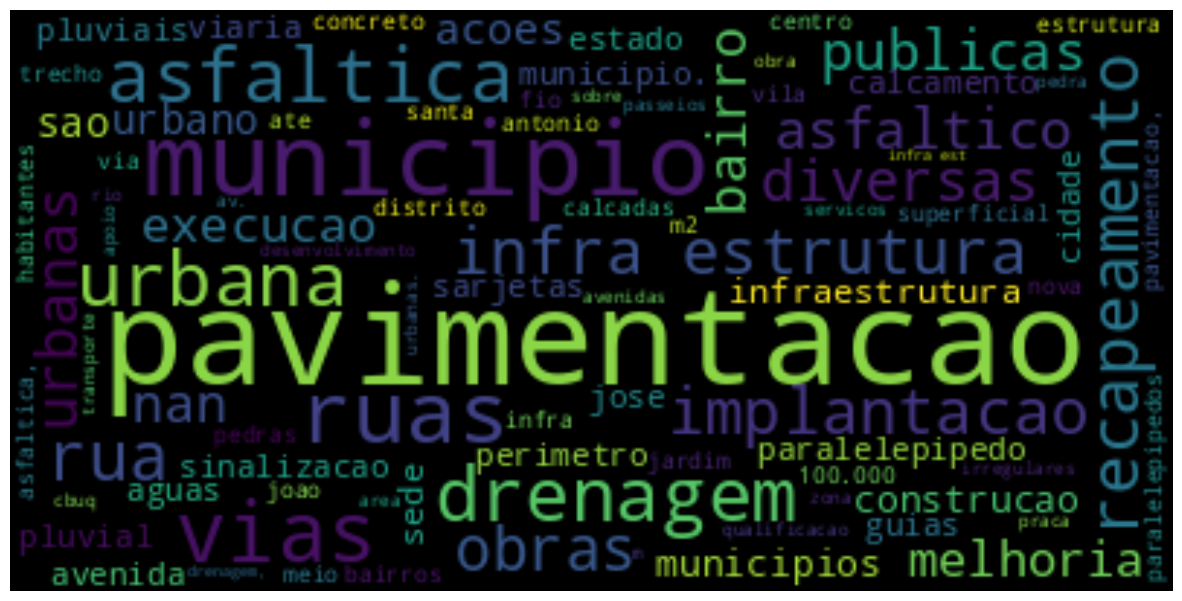

In [7]:
plota_nuvem_de_palavras(df_empreend)

In [8]:
coluna_empreendimento = 'empreendimento'
df_empreend[coluna_empreendimento]

0        IMPLANTACAO DO TRANSPORTE RAPIDO POR ONIBUS NO...
1                 CONSTRUCAO DO TERMINAL DE COSME E DAMIAO
2        IMPLANTA«ŸO DO TRANSPORTE RAPIDO POR ONIBUS NO...
3                                                      NAN
4        PAVIMENTACAO E QUALIFICACAO DE VIAS URBANAS, C...
                               ...                        
71243    REFROTA 17 RENOVACAO DO SISTEMA DE TRANSPORTE ...
71244    REFROTA 17 RENOVACAO DO SISTEMA DE TRANSPORTES...
71245    PRO - TRANSPORTES - REFROTA 17   AQUSICAO DE C...
71246    REFROTA 17 RENOVACAO DO SISTEMA DE TRANSPORTES...
71247    REFROTA17 RENOVACAO DO SISTEMA DE TRANSPORTES ...
Name: empreendimento, Length: 71248, dtype: object

In [9]:
df_empreend[coluna_empreendimento].isna().sum()

0

In [10]:
df_empreend[df_empreend[coluna_empreendimento]=='NAN']

,cod_mdr,cod_operacao,cod_saci,cod_convenio_siafi,cod_ag_operador,origem,dsc_concedente,dsc_fonte,dsc_unidade,cod_proposta,...,mun_AMAZONIA,mun_FRONTEIRA,mun_CAPITAL,uf_CODIGO_UF,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_NOME_UF
3,1-38004,354485.0,38004.0,0.0,NaN,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1-38010,347689.0,38010.0,0.0,NaN,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1-38011,347835.0,38011.0,0.0,NaN,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1-38014,349278.0,38014.0,0.0,NaN,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1-38015,349282.0,38015.0,0.0,NaN,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71035,2-1086400,1086400.0,NaN,940137.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SMDRU-DEMOB,32263/2022,...,N,N,N,42.0,-27.193,-49.797,350.0,245633.0,421460.0,SANTA CATARINA
71059,2-1086452,1086452.0,NaN,940177.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SMDRU-DEMOB,32752/2022,...,N,N,N,52.0,-17.971,-50.339,450.0,393793.0,521300.0,GOIAS
71072,2-1086471,1086471.0,NaN,940196.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SMDRU-DEMOB,32894/2022,...,N,N,N,22.0,-5.251,-42.210,170.0,1621354.0,220030.0,PIAUI
71097,2-1086508,1086508.0,NaN,940291.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SMDRU-DEMOB,33104/2022,...,N,N,N,29.0,-12.300,-39.308,189.0,393904.0,291380.0,BAHIA


In [11]:
df_empreend[df_empreend[coluna_empreendimento].str.contains('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')]

,cod_mdr,cod_operacao,cod_saci,cod_convenio_siafi,cod_ag_operador,origem,dsc_concedente,dsc_fonte,dsc_unidade,cod_proposta,...,mun_AMAZONIA,mun_FRONTEIRA,mun_CAPITAL,uf_CODIGO_UF,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_NOME_UF
11062,2-0164129,164129.0,NaN,0.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SEMOB,NaN,...,N,N,N,33.0,-22.786,-43.312,19.0,464573.0,330170.0,RIO DE JANEIRO
11617,2-0170720,170720.0,NaN,0.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SEMOB,NaN,...,N,N,N,35.0,-22.411,-47.561,625.0,498008.0,354390.0,SAO PAULO
11892,2-0173655,173655.0,NaN,0.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SEMOB,NaN,...,N,N,N,31.0,-17.256,-40.573,238.0,404892.0,317030.0,MINAS GERAIS
11919,2-0173691,173691.0,NaN,0.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SEMOB,NaN,...,N,N,N,22.0,-4.559,-41.972,140.0,322103.0,220271.0,PIAUI
11920,2-0173692,173692.0,NaN,0.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SEMOB,NaN,...,N,N,N,22.0,-10.443,-45.162,438.0,3051161.0,220290.0,PIAUI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18684,2-0214592,214592.0,NaN,0.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SEMOB,NaN,...,N,N,N,31.0,-17.399,-42.736,832.0,635262.0,317107.0,MINAS GERAIS
18693,2-0214604,214604.0,NaN,0.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SEMOB,NaN,...,N,N,N,33.0,-22.873,-42.343,15.0,633795.0,330020.0,RIO DE JANEIRO
18694,2-0214605,214605.0,NaN,0.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SEMOB,NaN,...,N,N,N,33.0,-22.873,-42.343,15.0,633795.0,330020.0,RIO DE JANEIRO
18745,2-0215294,215294.0,NaN,0.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SEMOB,NaN,...,N,N,N,26.0,-8.948,-37.423,478.0,1068286.0,260750.0,PERNAMBUCO


In [12]:
# # Vamos filtrar esses valores, antes de tratarmos as categorias de empreendimentos

# df_empreend = df_empreend[df_empreend[coluna_empreendimento] != "NAN"]
# df_empreend = df_empreend[~df_empreend[coluna_empreendimento].str.contains('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX', na=False)]
# df_empreend.shape

In [13]:
keywords = {
    'METRO': ['METR'],
    'PAVIMENTACAO': ['PAV', 'PAPV'],
    'REFROTA': ['FROTA'],
    'SINALIZACAO': ['SINAL', 'SEMAF'],
    'CALCAMENTO': ['CALCAM', 'CALÃAMENTO'],
    'CICLOVIA': ['CICLO'],
    'CORREDOR': ['CORREDOR', 'FAIXA EXCLUSIVA'],
    'DRENAGEM': ['DRENA'],
    'FERROVIA': ['FERROV', 'TRILH'],
    'RAPIDO': ['BRT', 'RAPIDO'],
    'VLT': ['VLT'],
    'RECAPEAMENTO': ['RECAP'],
    'VIARIA': [' VIARIA', 'VIÃRIA'],
    'AERO': ['AERO'],
    'REVITALIZACAO': ['REVIT'],
    'SARJETA': ['SARJETA', 'SARGETA'],
    'CALCADAS': ['CALCADA', 'CALÃADA', 'CALÃADÃO', 'CALCADAO', 'CALÂ¢ADAS'],
    'PRACA': ['PRACA', 'PRAÃA'],
    'PASSEIO': ['PASSEIO'],
    'TERMINAL': ['TERMINAL', "TERMINAIS"],
    'ASFALTO': ['ASFÃLTICA', 'ASFALT', 'ASFÃLTICA'],
    'PONTE': ['PONTE'],
    'ACESSIBILIDADE': ['ACESSIB', 'ACESSIV'],
    'PARQUE': ['PARQUE'],
    'TRANSPORTE COLETIVO': ['TRANSP.*COLETI', 'TRANSP.*PASSAGEI', 'ONIBUS'],
}
def trata_df_emprend(df, keywords, all_columns=True):

    for key, values in keywords.items():
        print(key)
        df[f'aux_emp_{key.lower().replace(" ", "_")}'] = df['empreendimento'].apply(
            lambda x: key if any(re.search(v, x, re.IGNORECASE) for v in values) else np.nan
        )

    df['new_empreend'] = df.filter(like='aux_emp_').apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

    if all_columns:
        return df
    return df.loc[:,~df.columns.str.startswith('aux')]

df_trat = trata_df_emprend(df_empreend.copy(), keywords)
df_trat[['empreendimento', 'new_empreend']]

METRO
PAVIMENTACAO
REFROTA
SINALIZACAO
CALCAMENTO
CICLOVIA
CORREDOR
DRENAGEM
FERROVIA
RAPIDO
VLT
RECAPEAMENTO
VIARIA
AERO
REVITALIZACAO
SARJETA
CALCADAS
PRACA
PASSEIO
TERMINAL
ASFALTO
PONTE
ACESSIBILIDADE
PARQUE
TRANSPORTE COLETIVO


,empreendimento,new_empreend
0,IMPLANTACAO DO TRANSPORTE RAPIDO POR ONIBUS NO...,"CORREDOR,RAPIDO,TERMINAL,TRANSPORTE COLETIVO"
1,CONSTRUCAO DO TERMINAL DE COSME E DAMIAO,TERMINAL
2,IMPLANTA«ŸO DO TRANSPORTE RAPIDO POR ONIBUS NO...,"CORREDOR,RAPIDO,TRANSPORTE COLETIVO"
3,NAN,
4,"PAVIMENTACAO E QUALIFICACAO DE VIAS URBANAS, C...","PAVIMENTACAO,CALCAMENTO,DRENAGEM,PARQUE"
...,...,...
71243,REFROTA 17 RENOVACAO DO SISTEMA DE TRANSPORTE ...,"REFROTA,TRANSPORTE COLETIVO"
71244,REFROTA 17 RENOVACAO DO SISTEMA DE TRANSPORTES...,"REFROTA,TRANSPORTE COLETIVO"
71245,PRO - TRANSPORTES - REFROTA 17 AQUSICAO DE C...,"REFROTA,TRANSPORTE COLETIVO"
71246,REFROTA 17 RENOVACAO DO SISTEMA DE TRANSPORTES...,"REFROTA,TRANSPORTE COLETIVO"


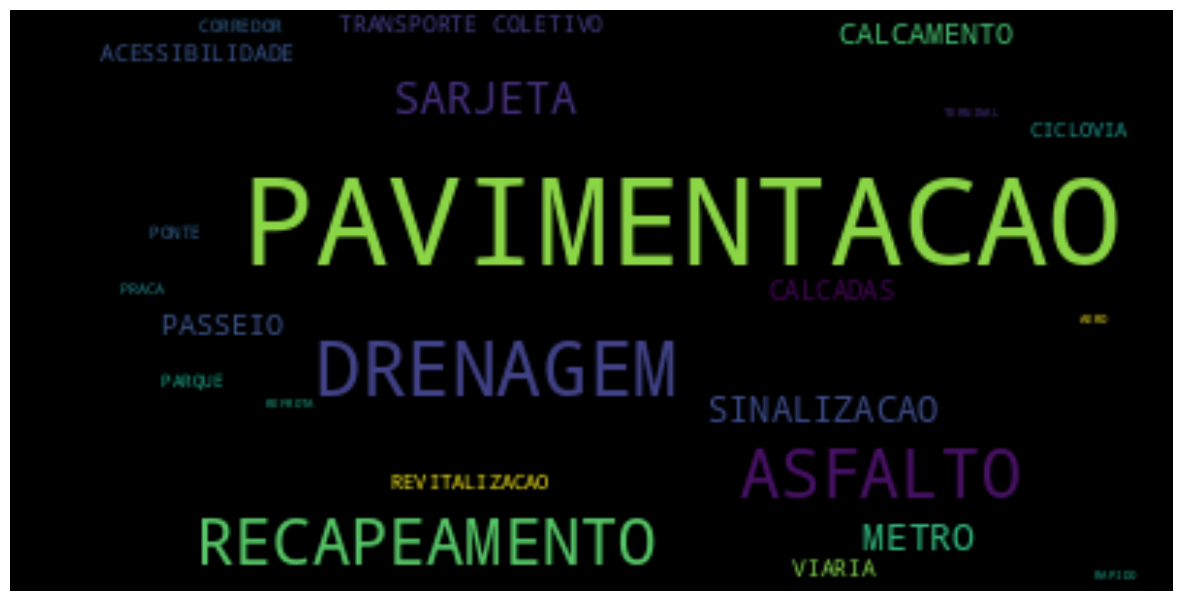

In [14]:
plota_nuvem_de_palavras(df_trat, empreendimento = False)

In [15]:
contagem2  = df_trat['new_empreend'].str.split(',').explode().value_counts()
contagem2

PAVIMENTACAO           46581
                       13002
DRENAGEM               12228
ASFALTO                 9541
RECAPEAMENTO            8737
SARJETA                 2986
METRO                   2364
SINALIZACAO             2122
CALCAMENTO              1344
PASSEIO                 1240
CALCADAS                1008
ACESSIBILIDADE           822
TRANSPORTE COLETIVO      744
VIARIA                   727
CICLOVIA                 458
REVITALIZACAO            412
PONTE                    345
PARQUE                   336
CORREDOR                 297
PRACA                    150
TERMINAL                 116
REFROTA                   92
AERO                      87
RAPIDO                    68
FERROVIA                  34
VLT                       26
Name: new_empreend, dtype: int64

In [16]:
count_unico = {}

for key in keywords:
    count_unico[key] = len(df_trat[df_trat['new_empreend'] == key]['empreendimento'])

dict(sorted(count_unico.items(), key=lambda item: item[1]))

{'AERO': 7,
 'FERROVIA': 11,
 'VLT': 11,
 'PRACA': 28,
 'SARJETA': 36,
 'RAPIDO': 37,
 'TERMINAL': 38,
 'REFROTA': 43,
 'PARQUE': 60,
 'CORREDOR': 75,
 'PONTE': 101,
 'ACESSIBILIDADE': 121,
 'ASFALTO': 133,
 'SINALIZACAO': 141,
 'DRENAGEM': 148,
 'PASSEIO': 205,
 'VIARIA': 229,
 'CICLOVIA': 250,
 'REVITALIZACAO': 277,
 'METRO': 295,
 'TRANSPORTE COLETIVO': 319,
 'CALCADAS': 347,
 'CALCAMENTO': 791,
 'RECAPEAMENTO': 4005,
 'PAVIMENTACAO': 24221}

In [17]:
sem_categoria = df_trat[(df_trat['new_empreend'] == '')][['empreendimento']]

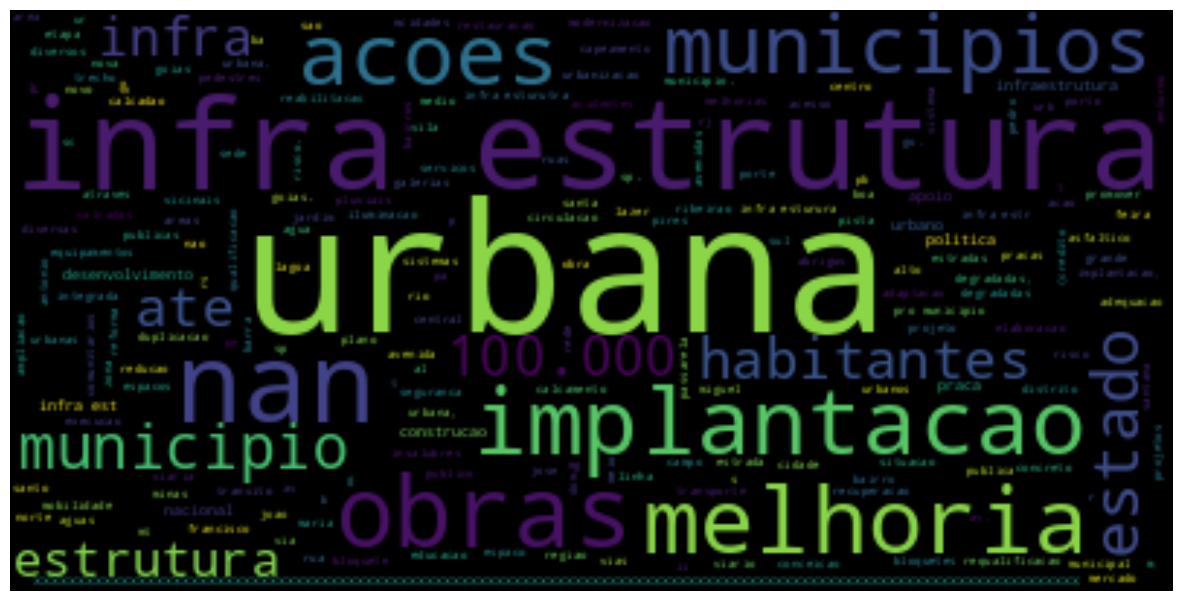

In [18]:
plota_nuvem_de_palavras(sem_categoria)

In [19]:
df_trat.to_csv('../dados/tratados/simu_carteira_empreendimentos.csv', index=False)